Decision Tree Rules:
|--- Windy <= 0.50
|   |--- Outlook <= 0.50
|   |   |--- Humidity <= 0.50
|   |   |   |--- class: 0
|   |   |--- Humidity >  0.50
|   |   |   |--- class: 1
|   |--- Outlook >  0.50
|   |   |--- class: 1
|--- Windy >  0.50
|   |--- Outlook <= 1.50
|   |   |--- Temperature <= 0.50
|   |   |   |--- class: 0
|   |   |--- Temperature >  0.50
|   |   |   |--- class: 1
|   |--- Outlook >  1.50
|   |   |--- class: 0



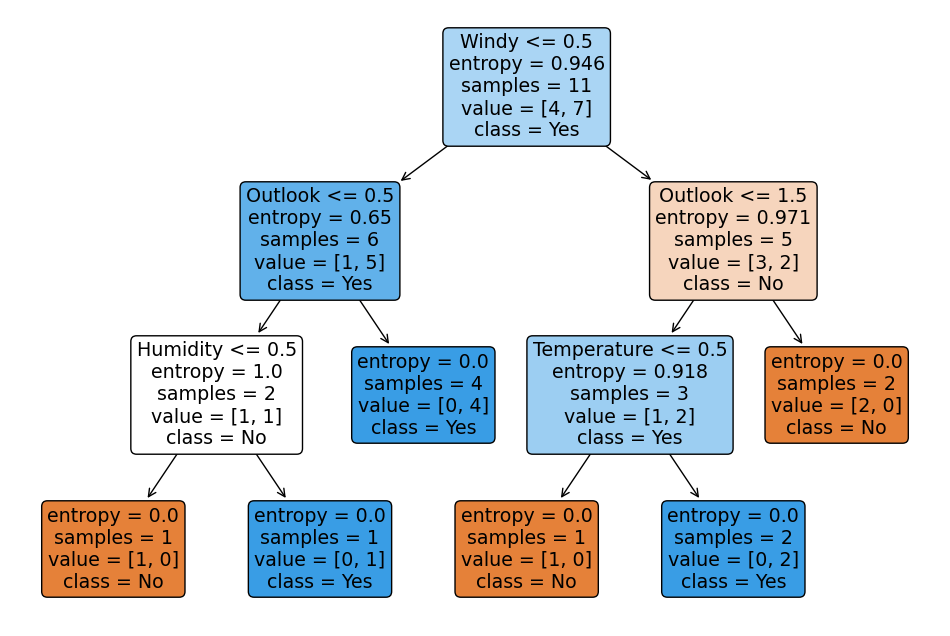


Predictions for additional test samples:
[0 1]


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# Load dataset from CSV file
file_path = 'decision.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Convert categorical variables to numerical labels
df_encoded = df.apply(lambda x: pd.factorize(x)[0])

# Split data into features and target
X = df_encoded.drop('PlayTennis', axis=1)
y = df_encoded['PlayTennis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train, y_train)

# Print decision tree rules
tree_rules = export_text(dt_model, feature_names=list(X.columns))
print("Decision Tree Rules:")
print(tree_rules)

# Additional test samples
additional_test_samples = pd.DataFrame({
    'Outlook': ['Sunny', 'Overcast'],
    'Temperature': ['Mild', 'Hot'],
    'Humidity': ['High', 'Normal'],
    'Windy': [True, False],
})

plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=list(X.columns), class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()

# Convert additional test samples to numerical labels
additional_test_samples_encoded = additional_test_samples.apply(lambda x: pd.factorize(x)[0])

# Make predictions on additional test samples
additional_predictions = dt_model.predict(additional_test_samples_encoded)
print("\nPredictions for additional test samples:")
print(additional_predictions)




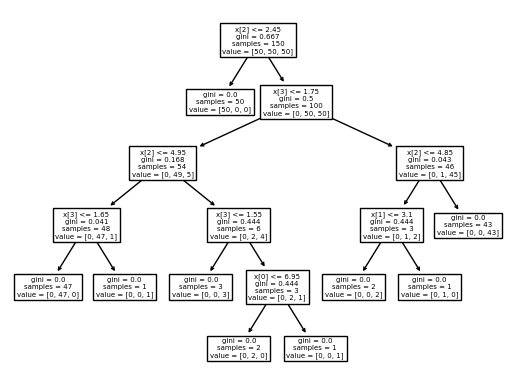

Accuracy: 30


In [2]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)
plt.show()

iris = load_iris()
X, y = iris.data, iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred,normalize=False)
print(f"Accuracy: {accuracy}")
